/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Training Gradient Boosting...
Gradient Boosting - Mean Squared Error: 266.2516786996671
Gradient Boosting - R^2 Score: 0.8651280229290746
--------------------------------------------------
Training Random Forest...
Random Forest - Mean Squared Error: 231.62115947086605
Random Forest - R^2 Score: 0.8826703971901197
--------------------------------------------------
Training Linear Regression...
Linear Regression - Mean Squared Error: 1220.9823997378649
Linear Regression - R^2 Score: 0.38150132601716213
--------------------------------------------------
Training MLP...
MLP - Mean Squared Error: 919.636638424033
MLP - R^2 Score: 0.5341504991935884
--------------------------------------------------
Training XGBoost...
XGBoost - Mean Squared Error: 236.51139759187484
XGBoost - R^2 Score: 0.8801932334899902
--------------------------------------------------
Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000421 seconds.
You can set

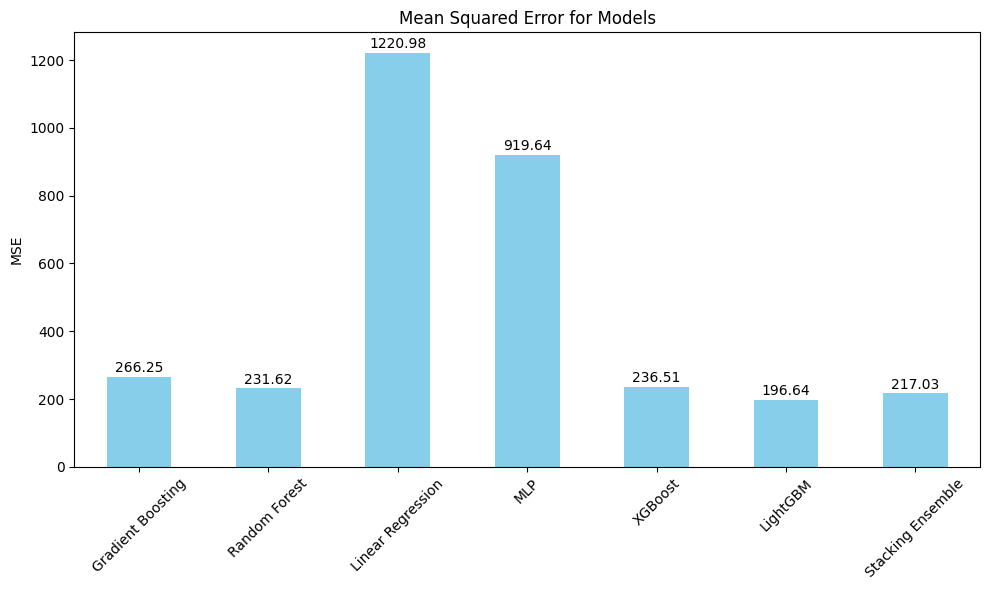

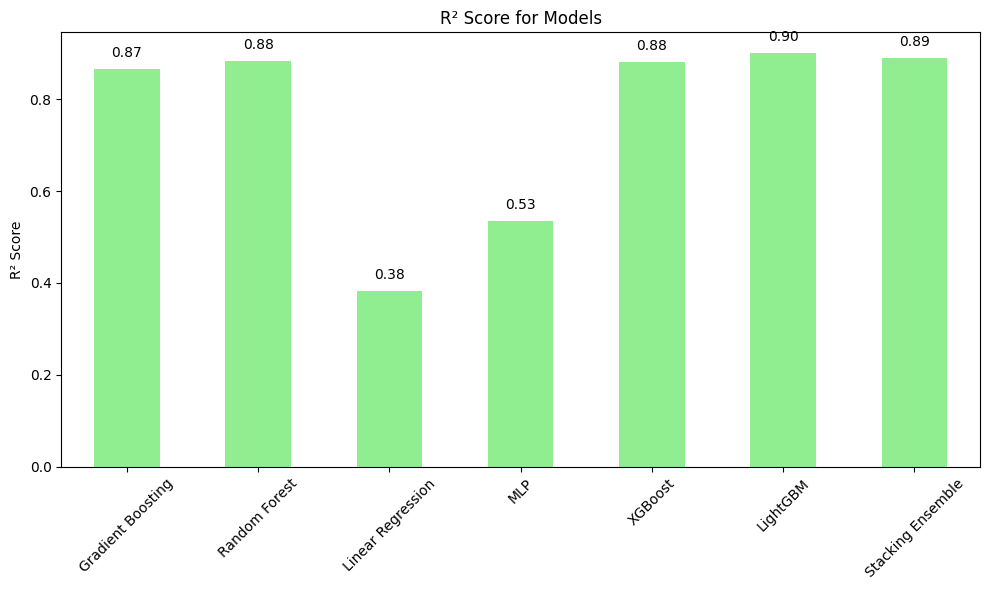

Scatter Plot for Gradient Boosting - Predicted vs Actual


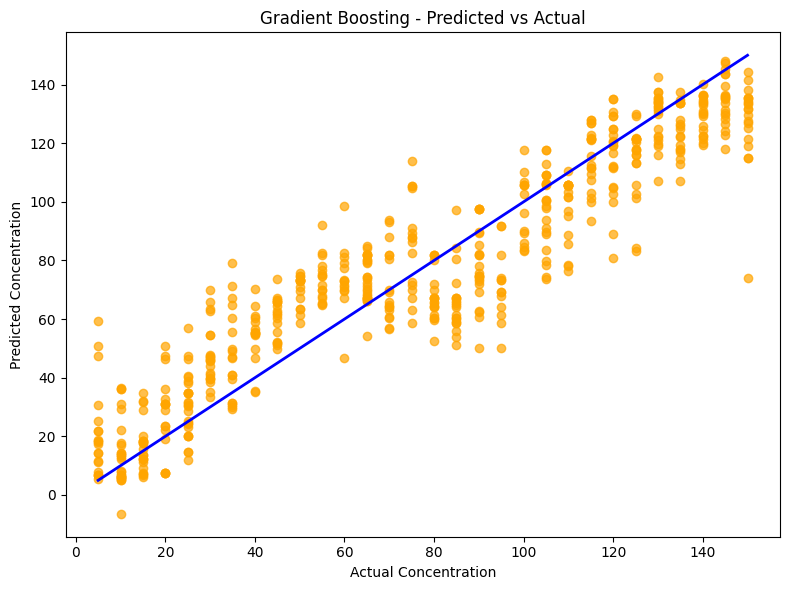

Scatter Plot for Random Forest - Predicted vs Actual


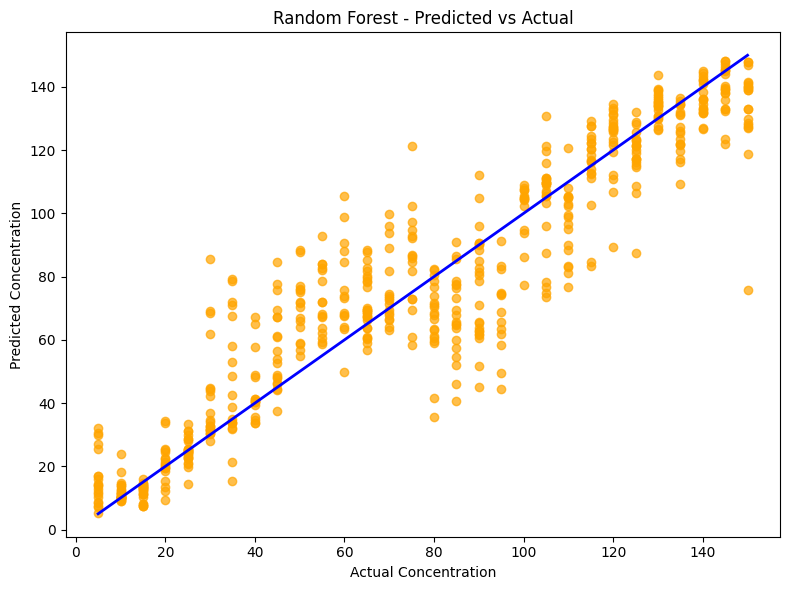

Scatter Plot for Linear Regression - Predicted vs Actual


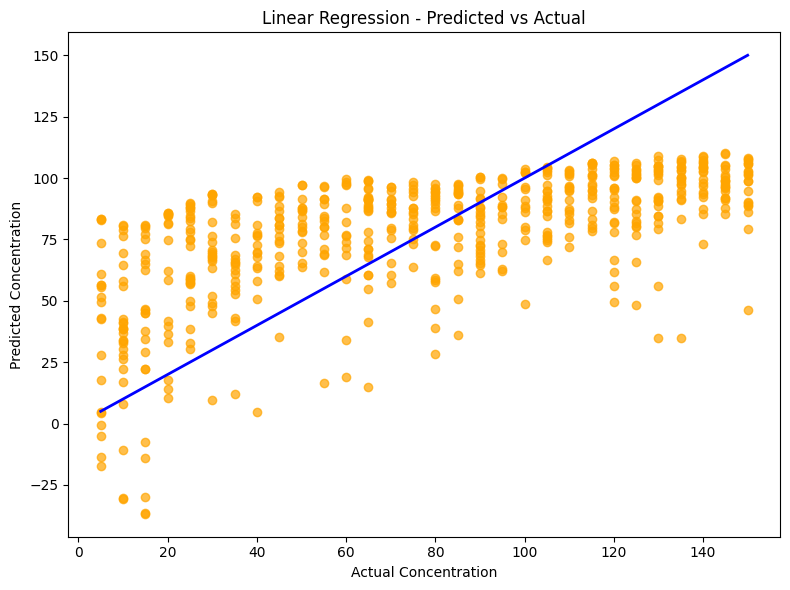

Scatter Plot for MLP - Predicted vs Actual


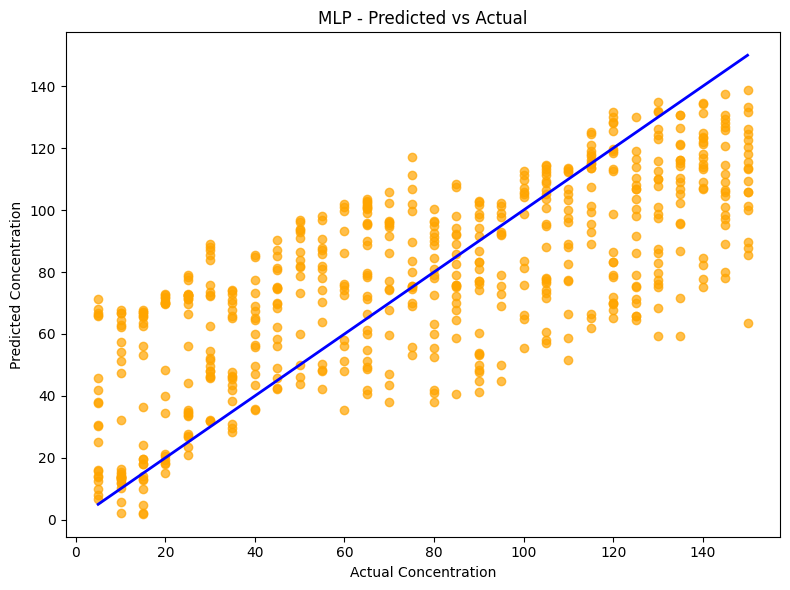

Scatter Plot for XGBoost - Predicted vs Actual


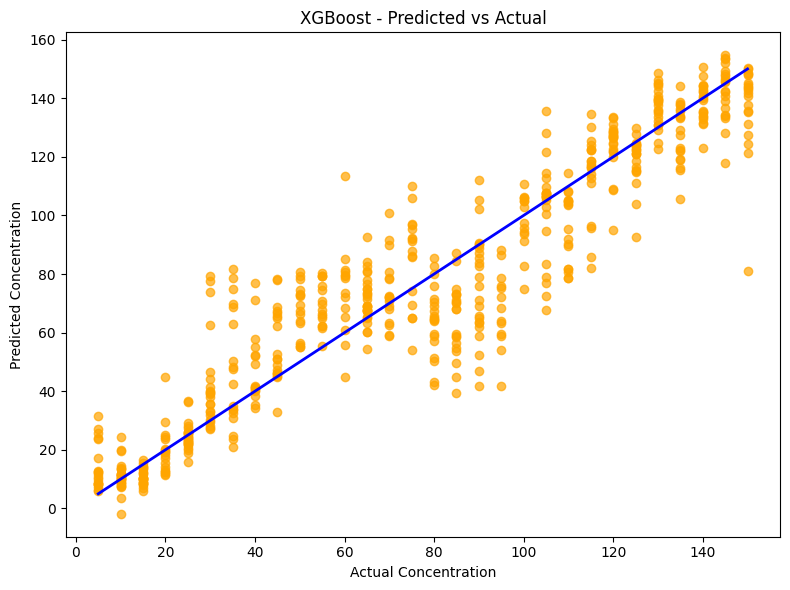

Scatter Plot for LightGBM - Predicted vs Actual


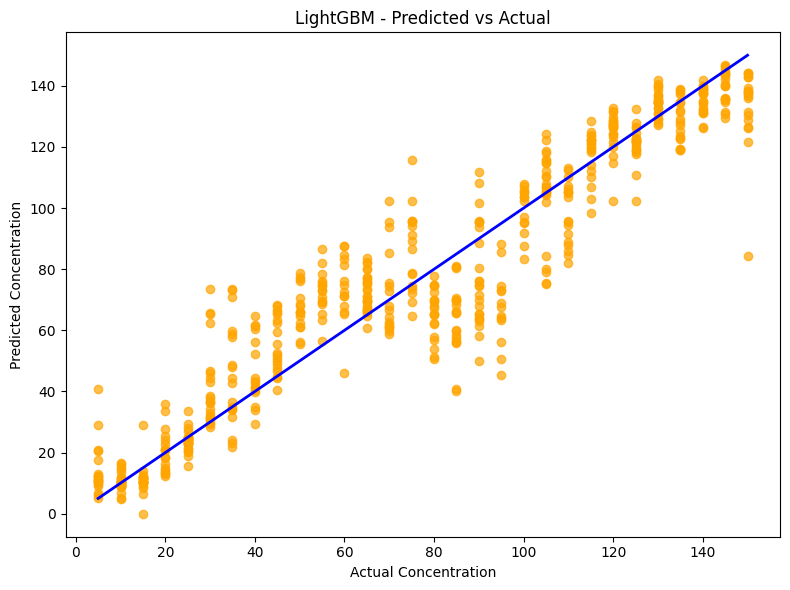

Scatter Plot for Stacking Ensemble - Predicted vs Actual


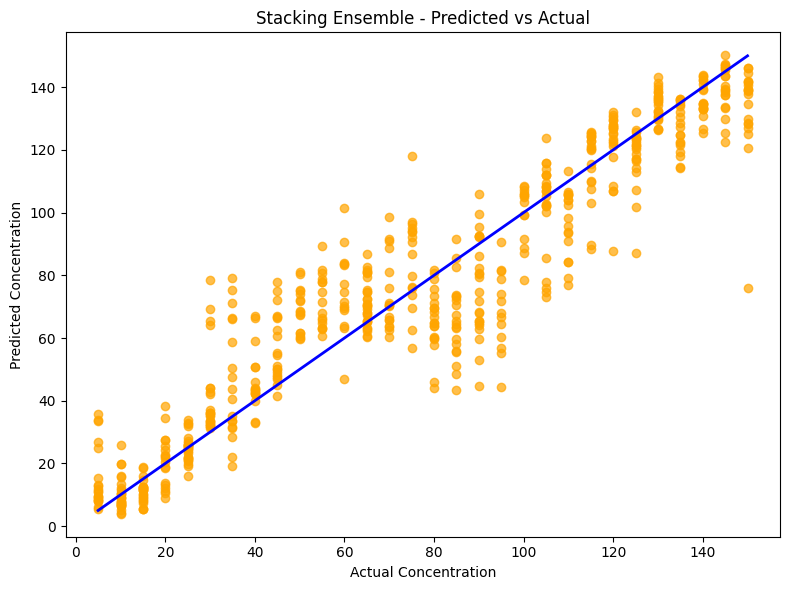

In [1]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import numpy as np

# Step 2: Load the CSV file
# Replace 'data.csv' with the path if it's different
data = pd.read_csv('data.csv')

# Step 3: Preprocess the data
X = data[['Voltage', 'Current']]  # Features
y = data['Concentration']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Define the models
models = {
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Linear Regression": LinearRegression(),
    "MLP": MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42)
}

# Step 5: Create Stacking Ensemble Model
stacking_model = StackingRegressor(
    estimators=[('rf', RandomForestRegressor(random_state=42)),
                ('gb', GradientBoostingRegressor(random_state=42)),
                ('xgb', XGBRegressor(random_state=42))],
    final_estimator=LinearRegression()
)

# Add stacking model to our models dictionary
models["Stacking Ensemble"] = stacking_model

# Step 6: Train, predict, and evaluate each model
performance = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    performance[model_name] = {'MSE': mse, 'R2': r2}

    print(f"{model_name} - Mean Squared Error: {mse}")
    print(f"{model_name} - R^2 Score: {r2}")
    print("-" * 50)

# Step 7: Performance Comparison - MSE and R² Bar Graphs
performance_df = pd.DataFrame(performance).T

# MSE Bar Graph with values displayed
plt.figure(figsize=(10, 6))
mse_plot = performance_df['MSE'].plot(kind='bar', color='skyblue')
plt.title('Mean Squared Error for Models')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.tight_layout()

# Show MSE values on top of bars
for i, v in enumerate(performance_df['MSE']):
    mse_plot.text(i, v + 5, f"{v:.2f}", ha='center', va='bottom')

plt.show()

# R² Bar Graph with values displayed
plt.figure(figsize=(10, 6))
r2_plot = performance_df['R2'].plot(kind='bar', color='lightgreen')
plt.title('R² Score for Models')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.tight_layout()

# Show R² values on top of bars
for i, v in enumerate(performance_df['R2']):
    r2_plot.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom')

plt.show()

# Step 8: Scatter Plots for Predicted vs Actual values for each model
for model_name, model in models.items():
    print(f"Scatter Plot for {model_name} - Predicted vs Actual")

    # Predict on test data
    y_pred = model.predict(X_test)

    # Scatter plot for Predicted vs Actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, color='orange')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', lw=2)  # Identity line
    plt.title(f'{model_name} - Predicted vs Actual')
    plt.xlabel('Actual Concentration')
    plt.ylabel('Predicted Concentration')
    plt.tight_layout()
    plt.show()


In [90]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import files

# Step 1: Load the CSV file (assumed to be uploaded)
data = pd.read_csv('data.csv')  # Replace 'data.csv' with your actual file path or filename

# Step 2: Preprocess the data
# Assuming columns 'Voltage', 'Current', and 'Concentration' are present
X = data[['Voltage', 'Current']]  # Features (adjust according to your dataset)
y = data['Concentration']        # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize LightGBM Dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Step 4: Set parameters for the model
params = {
    'objective': 'regression',       # For regression tasks
    'metric': 'mse',                 # Metric to evaluate
    'boosting_type': 'gbdt',         # Type of boosting (Gradient Boosting Decision Trees)
    'num_leaves': 75,                # Number of leaves in one tree
    'learning_rate': 0.04,           # Learning rate
    'feature_fraction': 0.9          # Fraction of features to use for each tree
}

# Step 5: Train the LightGBM model
gbm = lgb.train(params, train_data, valid_sets=[test_data], num_boost_round=100)

# Step 6: Make predictions
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R^2 Score: {r2}')

# Step 8: Make predictions on the uploaded new file
print("Please upload a CSV file for prediction (containing 'Voltage' and 'Current' columns):")
uploaded = files.upload()

# Assume the uploaded file has 'Voltage' and 'Current' columns
for filename in uploaded.keys():
    # Load the uploaded data
    new_scan_data = pd.read_csv(filename)

    # Check if required columns are present
    if not {'Voltage', 'Current'}.issubset(new_scan_data.columns):
        print("The uploaded file must contain 'Voltage' and 'Current' columns.")
    else:
        # Average the 'Voltage' and 'Current' columns to get a single representation for prediction
        voltage_avg = new_scan_data['Voltage'].mean()
        current_avg = new_scan_data['Current'].mean()

        # Create a DataFrame for the single scan to match model input shape
        scan_features = pd.DataFrame([[voltage_avg, current_avg]], columns=['Voltage', 'Current'])

        # Predict the concentration for the uploaded scan data
        concentration_pred = gbm.predict(scan_features)

        # Display the predicted concentration
        print(f"\nPredicted Concentration for the uploaded scan: {concentration_pred[0]:.4f} nM")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005795 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 354
[LightGBM] [Info] Number of data points in the train set: 2376, number of used features: 2
[LightGBM] [Info] Start training from score 77.659933
Mean Squared Error (MSE): 189.82069281599257
R^2 Score: 0.9038447672739586
Please upload a CSV file for prediction (containing 'Voltage' and 'Current' columns):


Saving scan1.csv to scan1 (1).csv

Predicted Concentration for the uploaded scan: 144.4000 nM


In [87]:
import pandas as pd
import numpy as np
from scipy.integrate import trapz
from scipy.stats import skew

# Function to calculate the necessary features for each concentration
def extract_features(data):
    # Initialize a dictionary to store extracted features
    features = {}

    # Extract Peak Height (max current value)
    features['Peak_Height'] = data['Current'].max()

    # Extract Peak Potential (corresponding voltage to Peak Height)
    peak_idx = data['Current'].idxmax()
    features['Peak_Potential'] = data.loc[peak_idx, 'Voltage']

    # Calculate Area Under Curve using trapezoidal rule
    features['Area_Under_Curve'] = trapz(data['Current'], data['Voltage'])

    # Calculate Mean Current
    features['Mean_Current'] = data['Current'].mean()

    # Calculate Standard Deviation of Current
    features['Std_Current'] = data['Current'].std()

    # Calculate Skewness of Current
    features['Skew_Current'] = skew(data['Current'])

    return features

# Function to process the dataset and extract features for each concentration
def process_data(input_file, concentration_range):
    # Read the CSV file
    df = pd.read_csv(input_file)

    # Clean up column names by removing leading/trailing spaces if any
    df.columns = df.columns.str.strip()

    # Check if the expected columns exist in the data
    if 'Concentration' not in df.columns or 'Voltage' not in df.columns or 'Current' not in df.columns:
        print("Error: One or more required columns ('Concentration', 'Voltage', 'Current') are missing.")
        print("Available columns:", df.columns)
        return

    # Create an empty list to store all rows of the output
    output_data = []

    # Process data for each concentration in the given range
    for concentration in concentration_range:
        concentration_data = df[df['Concentration'] == concentration]

        # Extract features for the current concentration
        features = extract_features(concentration_data)
        features['Concentration'] = concentration

        # Append the features along with concentration to the output data
        output_data.append(features)

    # Convert the output data to a DataFrame
    output_df = pd.DataFrame(output_data)

    # Save the output to a new CSV file
    output_df.to_csv('processed_data.csv', index=False)
    print("Processed data saved to 'processed_data.csv'.")

# Ask for file upload
from google.colab import files

print("Please upload your CSV file for processing.")
uploaded = files.upload()

# After file upload, extract the file name
for filename in uploaded.keys():
    input_file = filename
    print(f"File uploaded: {input_file}")

    # Define the concentration range from 5 to 150 with a step of 5
    concentration_range = list(range(5, 151, 5))  # 5, 10, 15, ..., 150

    # Process the data with the specified concentration range
    process_data(input_file, concentration_range)


Please upload your CSV file for processing.


Saving data.csv to data (1).csv
File uploaded: data (1).csv
Processed data saved to 'processed_data.csv'.


<ipython-input-87-33514f413827>:19: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  features['Area_Under_Curve'] = trapz(data['Current'], data['Voltage'])
<ipython-input-87-33514f413827>:19: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  features['Area_Under_Curve'] = trapz(data['Current'], data['Voltage'])
<ipython-input-87-33514f413827>:19: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  features['Area_Under_Curve'] = trapz(data['Current'], data['Voltage'])
<ipython-input-87-33514f413827>:19: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  features['Area_Under_Curve'] = trapz(data['Current'], data['Voltage'])
<ipython-input-87-33514f

Model Evaluation on Training Data:
Mean Squared Error (MSE): 26.760499999999997
R-squared (R²): 0.9857118576195774


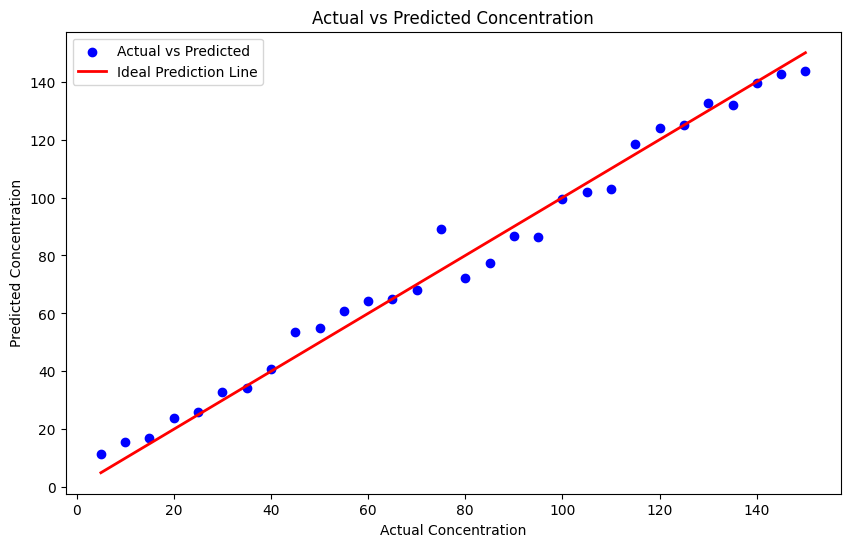

Please upload your CSV file for prediction.


Saving scan_55.csv to scan_55.csv
File uploaded: scan_55.csv
Predicted Concentration: 53.45


<ipython-input-86-4eb2f3749613>:24: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  features['Area_Under_Curve'] = trapz(data['Current'], data['Voltage'])


In [86]:
import pandas as pd
import numpy as np
from scipy.integrate import trapz
from scipy.stats import skew
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from google.colab import files

# Function to calculate the necessary features for each concentration
def extract_features(data):
    # Initialize a dictionary to store extracted features
    features = {}

    # Extract Peak Height (max current value)
    features['Peak_Height'] = data['Current'].max()

    # Extract Peak Potential (corresponding voltage to Peak Height)
    peak_idx = data['Current'].idxmax()
    features['Peak_Potential'] = data.loc[peak_idx, 'Voltage']

    # Calculate Area Under Curve using trapezoidal rule
    features['Area_Under_Curve'] = trapz(data['Current'], data['Voltage'])

    # Calculate Mean Current
    features['Mean_Current'] = data['Current'].mean()

    # Calculate Standard Deviation of Current
    features['Std_Current'] = data['Current'].std()

    # Calculate Skewness of Current
    features['Skew_Current'] = skew(data['Current'])

    return features

# Load the training dataset
train_data = pd.read_csv("processed_data.csv")

# Extract features and target variable (Concentration)
X_train = train_data.drop(columns=['Concentration'])  # Features
y_train = train_data['Concentration']  # Target variable (Concentration)

# Train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on training data
y_train_pred = model.predict(X_train)

# Calculate evaluation metrics
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)

# Print evaluation details
print(f"Model Evaluation on Training Data:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Plot Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', lw=2, label='Ideal Prediction Line')
plt.xlabel('Actual Concentration')
plt.ylabel('Predicted Concentration')
plt.title('Actual vs Predicted Concentration')
plt.legend()
plt.show()

# Function to process the uploaded data, extract features, and predict concentration
def process_and_predict(input_file):
    # Read the uploaded CSV file
    df = pd.read_csv(input_file)

    # Clean up column names by removing leading/trailing spaces if any
    df.columns = df.columns.str.strip()

    # Check if the expected columns exist in the data
    if 'Voltage' not in df.columns or 'Current' not in df.columns:
        print("Error: One or more required columns ('Voltage', 'Current') are missing.")
        print("Available columns:", df.columns)
        return

    # Extract features for the uploaded scan
    features = extract_features(df)

    # Convert the features into a DataFrame for prediction
    features_df = pd.DataFrame([features])

    # Predict the concentration using the trained model
    predicted_concentration = model.predict(features_df)
    print(f"Predicted Concentration: {predicted_concentration[0]}")

# Ask for file upload
print("Please upload your CSV file for prediction.")
uploaded = files.upload()

# After file upload, extract the file name and process
for filename in uploaded.keys():
    input_file = filename
    print(f"File uploaded: {input_file}")

    # Predict the concentration for the uploaded scan data
    process_and_predict(input_file)


In [59]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load and Explore the Data
data = pd.read_csv('data.csv')  # Ensure 'data.csv' is in the same directory
print(data.head())
print(data.info())
print(data.describe())

# Step 2: Data Preprocessing
if data.isnull().sum().sum() > 0:
    print("Warning: Data contains NaN values. Filling NaNs with 0.")
    data.fillna(0, inplace=True)

X = data[['Voltage', 'Current']]
y = data['Concentration']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape the data for sequential models (LSTM or CNN)
X_reshaped = X_scaled.reshape(-1, 1, 2)  # Reshape to (samples, time steps, features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# Step 3: Model Training with CNN
cnn_model = models.Sequential()
cnn_model.add(layers.Conv1D(32, kernel_size=1, activation='relu', input_shape=(1, 2)))  # Change kernel_size to 1
cnn_model.add(layers.MaxPooling1D(pool_size=1))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(layers.Dense(1))  # Output layer for regression
cnn_model.compile(optimizer='adam', loss='mean_squared_error')
cnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Step 3: Model Training with LSTM
lstm_model = models.Sequential()
lstm_model.add(layers.LSTM(32, input_shape=(1, 2), return_sequences=False))
lstm_model.add(layers.Dense(64, activation='relu'))
lstm_model.add(layers.Dense(1))  # Output layer for regression
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Step 4: Validation and Testing
# Evaluate CNN model
y_pred_cnn = cnn_model.predict(X_test)
mse_cnn = mean_squared_error(y_test, y_pred_cnn)
r2_cnn = r2_score(y_test, y_pred_cnn)

# Evaluate LSTM model
y_pred_lstm = lstm_model.predict(X_test)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)

# Print evaluation results
print(f'CNN Mean Squared Error (MSE): {mse_cnn:.4f}')
print(f'CNN R² Score: {r2_cnn:.4f}')
print(f'LSTM Mean Squared Error (MSE): {mse_lstm:.4f}')
print(f'LSTM R² Score: {r2_lstm:.4f}')

    Voltage    Current  Concentration
0 -0.500170  19.039912              5
1 -0.489963  15.343930              5
2 -0.479755  13.271941              5
3 -0.469548  11.871947              5
4 -0.459340  10.863951              5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2970 entries, 0 to 2969
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Voltage        2970 non-null   float64
 1   Current        2970 non-null   float64
 2   Concentration  2970 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 69.7 KB
None
           Voltage      Current  Concentration
count  2970.000000  2970.000000    2970.000000
mean      0.000000     9.687565      77.500000
std       0.291754     4.788381      43.284495
min      -0.500170     2.994236       5.000000
25%      -0.255189     5.907973      40.000000
50%       0.000000     9.018584      77.500000
75%       0.255189    12.343569     115.000000
max       0.50

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 7713.6763 - val_loss: 7829.0039
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7188.7310 - val_loss: 6082.2100
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5008.4883 - val_loss: 3117.2688
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2398.6887 - val_loss: 1486.8959
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1361.3942 - val_loss: 1196.3793
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1181.1572 - val_loss: 1103.4723
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1092.2488 - val_loss: 1059.9854
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1036.3164 - val_loss: 1041.4869
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 975.0097 - val_loss: 1014.7970
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 975.9316 - val_loss: 1000.6151
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1002.9959 - val_loss: 983.2239
Epoch 12/50
60/60 ━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 7795.6084 - val_loss: 8168.9263
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7445.5059 - val_loss: 7699.4839
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6967.7881 - val_loss: 6483.4453
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5502.2715 - val_loss: 4186.9531
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3105.9233 - val_loss: 2024.2103
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1554.0295 - val_loss: 1297.8071
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1209.3442 - val_loss: 1197.3927
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1158.0869 - val_loss: 1173.5961
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1132.4155 - val_loss: 1155.5377
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1132.6713 - val_loss: 1139.1140
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1140.8433 - val_loss: 1131.1167
Epoch 12/50
60/60 

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 609
[LightGBM] [Info] Number of data points in the train set: 2376, number of used features: 3
[LightGBM] [Info] Start training from score 77.659933
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

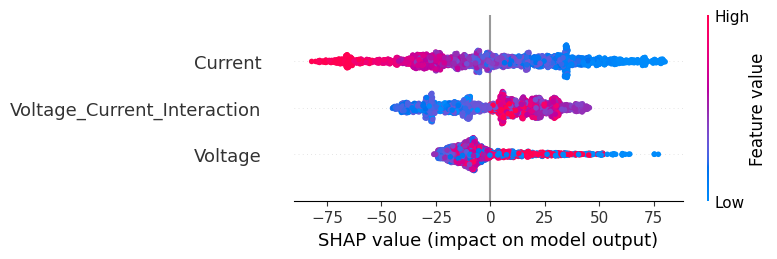

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000126 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 609
[LightGBM] [Info] Number of data points in the train set: 2376, number of used features: 3
[LightGBM] [Info] Start training from score 77.659933
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000128 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 609
[LightGBM] [Info] Number of data points in the train set: 1900, number of used features: 3
[LightGBM] [Info] Start training from score 78.123684
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 609
[LightGBM] [Info] Number of data points in the train set: 1901, number of used features: 3
[LightGBM] [Info] Start training f

Saving scan1.csv to scan1 (2).csv
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
Predicted Concentration for the uploaded scan: 142.8754µM


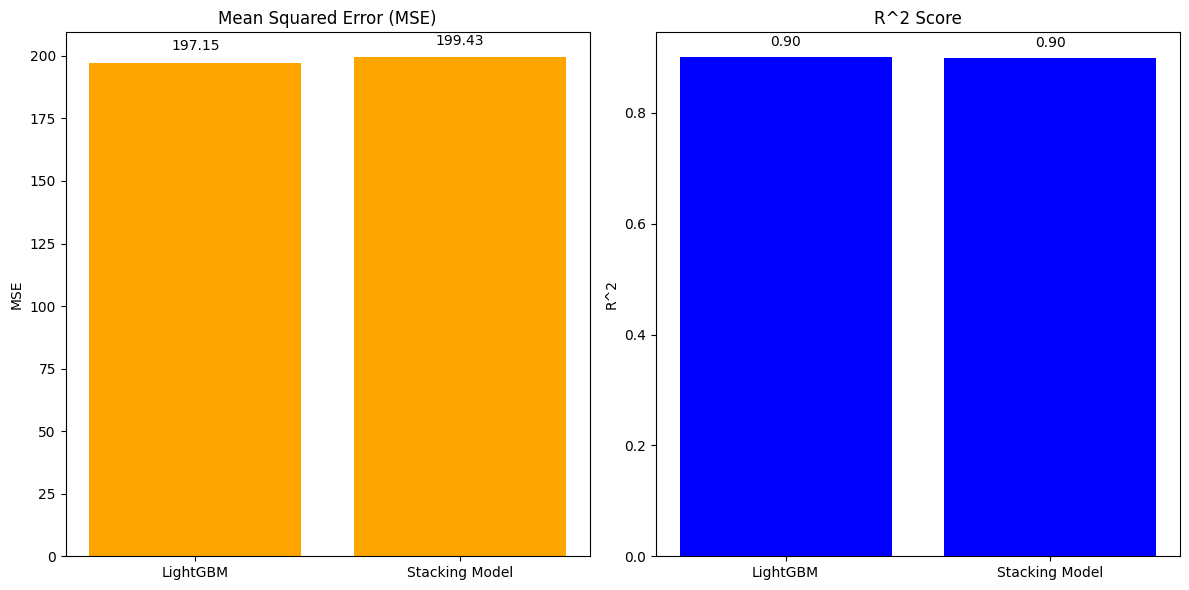

In [44]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
import shap
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the CSV file
data = pd.read_csv('data.csv')  # Replace with your data path

# Step 2: Preprocess the data
# Assuming the dataset has 'Voltage', 'Current', and 'Concentration' columns
X = data[['Voltage', 'Current']]  # Features
y = data['Concentration']         # Target variable

# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Feature Engineering (if needed)
# Example: Create interaction terms (Voltage * Current)
X_train['Voltage_Current_Interaction'] = X_train['Voltage'] * X_train['Current']
X_test['Voltage_Current_Interaction'] = X_test['Voltage'] * X_test['Current']

# Step 5: Hyperparameter Tuning using GridSearchCV
param_grid = {
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [-1, 5, 10],
    'feature_fraction': [0.7, 0.8, 0.9, 1.0],
    'bagging_fraction': [0.7, 0.8, 1.0],
    'boosting_type': ['gbdt', 'dart', 'goss'],
}

gbm = lgb.LGBMRegressor(objective='regression', metric='mse')

# Grid search for optimal parameters
grid_search = GridSearchCV(gbm, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print(f"Best parameters found by grid search: {best_params}")

# Step 6: Train the model with the best parameters
model = lgb.LGBMRegressor(**best_params)
model.fit(X_train, y_train)

# Step 7: Make predictions and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"LightGBM - Mean Squared Error: {mse}")
print(f"LightGBM - R^2 Score: {r2}")

# Step 8: Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated MSE: {-cv_scores.mean()} (+/- {cv_scores.std()})")

# Step 9: Feature importance using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_train)

# Step 10: Stacking Model for Ensemble Learning
base_learners = [
    ('rf', RandomForestRegressor(n_estimators=100)),
    ('xgb', lgb.LGBMRegressor(objective='regression'))
]

stacking_model = StackingRegressor(estimators=base_learners, final_estimator=LinearRegression())
stacking_model.fit(X_train, y_train)

# Evaluate Stacking model
y_pred_stacking = stacking_model.predict(X_test)
mse_stacking = mean_squared_error(y_test, y_pred_stacking)
r2_stacking = r2_score(y_test, y_pred_stacking)

print(f"Stacking Model - MSE: {mse_stacking}, R^2: {r2_stacking}")

# Step 11: Make a prediction on the uploaded file
from google.colab import files

print("Please upload a CSV file with the new scan data (containing 'Voltage' and 'Current' columns):")
uploaded = files.upload()

for filename in uploaded.keys():
    # Load the new scan data
    new_scan_data = pd.read_csv(filename)

    # Check if required columns are present
    if not {'Voltage', 'Current'}.issubset(new_scan_data.columns):
        print("The uploaded file must contain 'Voltage' and 'Current' columns.")
    else:
        # Create interaction term for the new scan
        new_scan_data['Voltage_Current_Interaction'] = new_scan_data['Voltage'] * new_scan_data['Current']

        # Create a DataFrame for prediction
        scan_features = new_scan_data[['Voltage', 'Current', 'Voltage_Current_Interaction']].mean().to_frame().T

        # Make prediction using LightGBM model
        concentration_pred = model.predict(scan_features)

        print(f"Predicted Concentration for the uploaded scan: {concentration_pred[0]:.4f}µM")

# Step 12: Visualize the performance comparison (Bar Graph)
import matplotlib.pyplot as plt

# Create a DataFrame to store the performance metrics for comparison
performance_data = {
    'Model': ['LightGBM', 'Stacking Model'],
    'MSE': [mse, mse_stacking],
    'R^2': [r2, r2_stacking]
}

performance_df = pd.DataFrame(performance_data)

# Plot MSE and R^2 scores
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# MSE Bar Graph
ax[0].bar(performance_df['Model'], performance_df['MSE'], color='orange')
ax[0].set_title('Mean Squared Error (MSE)')
ax[0].set_ylabel('MSE')
for i, value in enumerate(performance_df['MSE']):
    ax[0].text(i, value + 5, f'{value:.2f}', ha='center')

# R^2 Bar Graph
ax[1].bar(performance_df['Model'], performance_df['R^2'], color='blue')
ax[1].set_title('R^2 Score')
ax[1].set_ylabel('R^2')
for i, value in enumerate(performance_df['R^2']):
    ax[1].text(i, value + 0.02, f'{value:.2f}', ha='center')

plt.tight_layout()
plt.show()

